# Unbiased Estimator of the Standard Deviation

Motivation: 

Why the unbiased estimate of standard deviation is to divide by $n-1$



Generating a population:

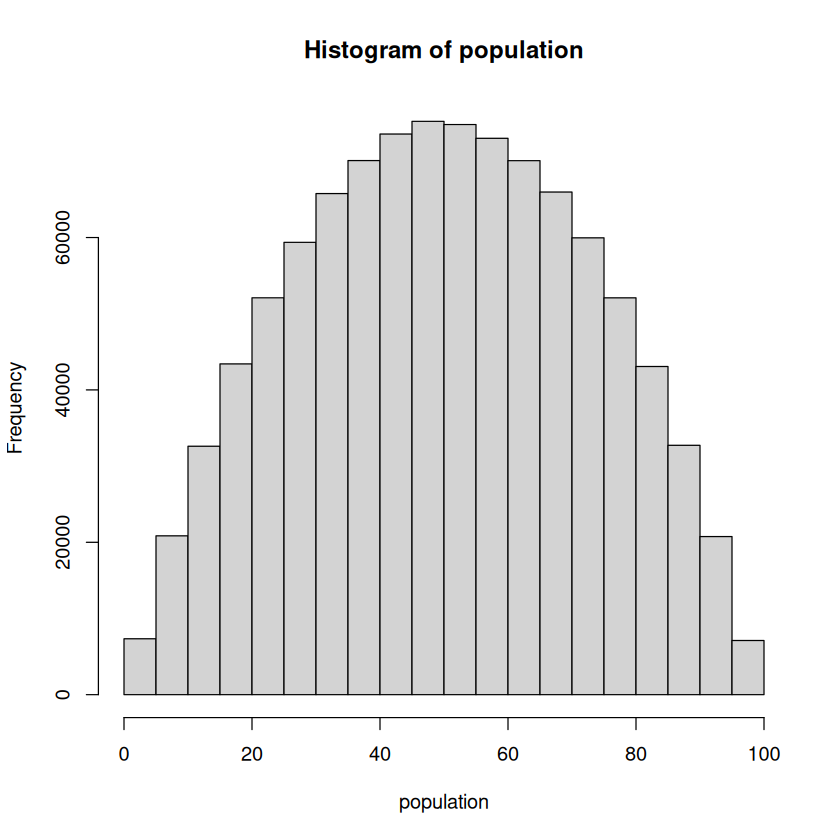

In [120]:
N = 1e6
population <- rbeta(N, 2,2) * 100
hist(population)

In [121]:
## the `sd` function in R uses the correction to calculate. So to get the population sd:
pop_mean <- mean(population)
pop_sd <- sqrt(sum((population-pop_mean)^2)/N)

pop_sd

[1] 22.34936

## Standard Deviation - Biased  

Show calculating the sample standard deviation dividing by $N$ is a biased estimator.

In [122]:
n <- 5
C <- 10^4

sampbiased <- replicate(C, {
    samp <- sample(population, n, replace=TRUE)
    samp_mean <- mean(samp)
    sd_biased <- sqrt(sum(((samp-samp_mean)^2)/n))
})

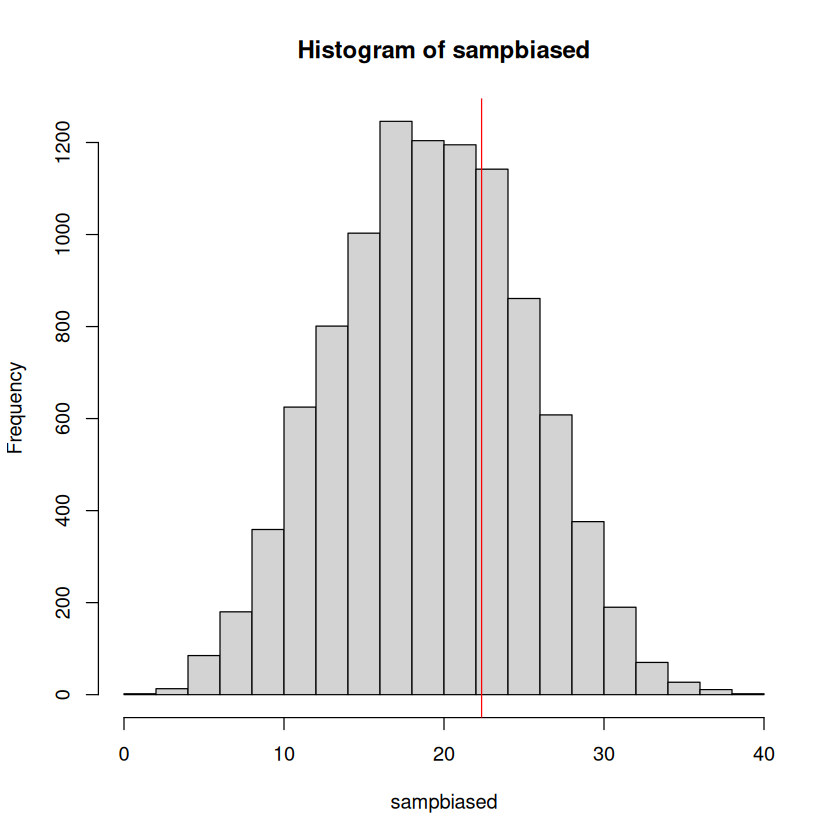

In [123]:
hist(sampbiased)
abline(v=pop_sd, col="red")

In [124]:
## Mean of the standard deviations generated by our samples
mean(sampbiased)

[1] 19.11511

In [125]:
## The distance between the population sd and the biased sample estimated
(biased_diff = pop_sd-mean(sampbiased))

[1] 3.234248

## Unbiased Estimator

Dividing by $N-1$ gives a closer estimation to the population variance

In [126]:
samp_unbiased <- replicate(C, {
    samp = sample(population, n, replace=TRUE)
    samp_mean = mean(samp)
    sd_unbiased = sqrt(sum(((samp-samp_mean)^2)/(n-1)))
})

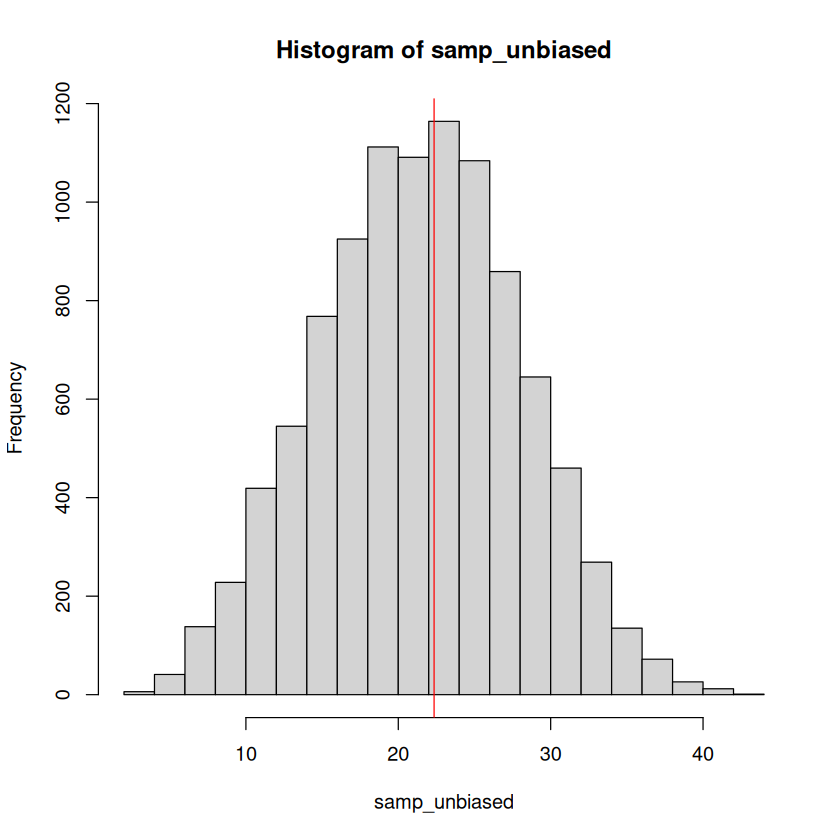

In [127]:
hist(samp_unbiased)
abline(v=pop_sd, col="red")

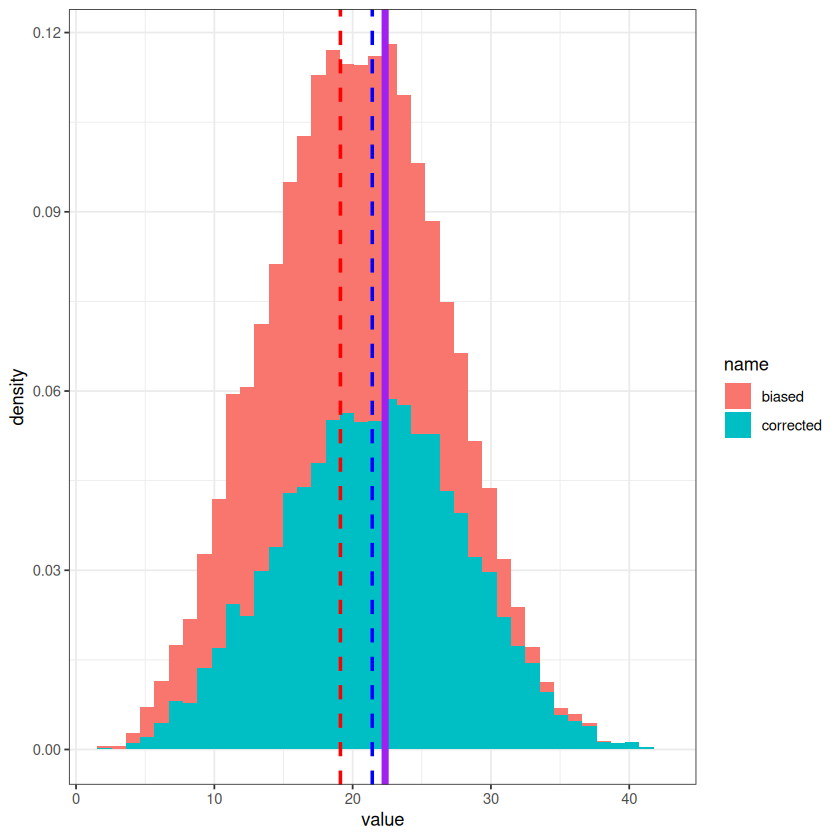

In [128]:
library(ggplot2)
library(tidyr)

df <- data.frame(corrected = samp_unbiased, biased = sampbiased)
df_tidy <- tidyr::pivot_longer(df, c(biased, corrected))

mean_corrected <- mean(df$corrected)
mean_biased <- mean(df$biased)

p <- ggplot(df_tidy, aes(fill = name, x = value, y = after_stat(density))) + 
  geom_histogram(bins=40) +
  # geom_density(alpha = 0.0) +
  geom_vline(xintercept = mean_corrected, color = "blue", linetype = "dashed", size = 1) +
  geom_vline(xintercept = mean_biased, color = "red", linetype = "dashed", size = 1) +
  geom_vline(xintercept = pop_sd, color = "purple", linetype = "solid", size = 2) +
  theme_bw()
p

In [129]:
var(samp_unbiased)
var(sampbiasedk)

[1] 42.82406

ERROR: Error in is.data.frame(x): object 'sampbiasedk' not found


In [130]:
## Mean of the standard deviations generated by our samples
mean(samp_unbiased)

[1] 21.41855

In [131]:
## The distance between the population sd and the biased sample estimated
(unbiased_diff = sd(population)-mean(samp_unbiased))

[1] 0.9308279

The unbiased sample estimator is a closer estimation to the population standard deviation than the biased sample estimator. 

In [132]:
unbiased_diff < biased_diff

[1] TRUE